## 1. Import libraries and Dataset

In [1]:
import pandas as pd
import numpy as np

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
%matplotlib inline

In [4]:
df = pd.read_csv('Retail Customer Analytics Assignment1.csv', encoding = 'utf-8', sep = '\t')

/Users/yapinghuang/opt/anaconda3/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3165: DtypeWarning: Columns (4) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


In [5]:
df.head()

,Customer_ID,CategoryGroup,Category,InvoiceDate,Quantity,TotalPrice
0,15550,Games & Toys,Games & Toys,1/1/2020,1,£8
1,15550,Bags & Purses,Jumbo Bag,1/1/2020,1,£2
2,15550,Decorations,Doilies,1/1/2020,1,£1
3,15550,Bags & Purses,Purse,1/1/2020,2,£3
4,15550,Bags & Purses,Purse,1/1/2020,2,£3


In [6]:
df.dtypes

Customer_ID       int64
CategoryGroup    object
Category         object
InvoiceDate      object
Quantity         object
TotalPrice       object
dtype: object

In [9]:
df.columns

Index(['Customer_ID', 'CategoryGroup', 'Category', 'InvoiceDate', 'Quantity',
       'TotalPrice'],
      dtype='object')

##  2. Transform Datatype
- change InvoiceDate from String to date format
- change Total Price and Quantity from String to Integer

In [8]:
df['InvoiceDate'] = df['InvoiceDate'].apply(pd.to_datetime)

In [10]:
# df.Quantity.astype(int)
df['TotalPrice'] = df.TotalPrice.apply(lambda x:x.replace("£","")).apply(lambda x:x.replace(",", ""))

In [11]:
df['TotalPrice'] = df['TotalPrice'].apply(pd.to_numeric)

In [12]:
df.dtypes

Customer_ID               int64
CategoryGroup            object
Category                 object
InvoiceDate      datetime64[ns]
Quantity                 object
TotalPrice                int64
dtype: object

In [13]:
new_df = df.replace("1,008", "1008")

In [14]:
new_df = new_df.replace("1,200", "1200")

In [15]:
new_df = new_df.replace("1,000", "1000")

In [16]:
new_df = new_df.replace("1,500", "1500")

In [17]:
new_df['Quantity'] = new_df['Quantity'].apply(pd.to_numeric)

In [18]:
new_df.dtypes

Customer_ID               int64
CategoryGroup            object
Category                 object
InvoiceDate      datetime64[ns]
Quantity                  int64
TotalPrice                int64
dtype: object

In [19]:
new_df["Total Sales"] = new_df["Quantity"]*df['TotalPrice']

In [20]:
new_df.head()

,Customer_ID,CategoryGroup,Category,InvoiceDate,Quantity,TotalPrice,Total Sales
0,15550,Games & Toys,Games & Toys,2020-01-01,1,8,8
1,15550,Bags & Purses,Jumbo Bag,2020-01-01,1,2,2
2,15550,Decorations,Doilies,2020-01-01,1,1,1
3,15550,Bags & Purses,Purse,2020-01-01,2,3,6
4,15550,Bags & Purses,Purse,2020-01-01,2,3,6


In [21]:
new_df.to_csv("Retail Customer Analytics Cleaned data.csv")

## 3. Group customers data into: monetary, frequecy and recency

In [24]:
df1 = pd.DataFrame(new_df.groupby("Customer_ID", as_index=False)["InvoiceDate"].max()).rename(
    columns={"InvoiceDate":"Recency"})

In [25]:
from datetime import date

In [26]:
date.today()

datetime.date(2022, 9, 29)

In [27]:
df1['Recency'][1].date()

datetime.date(2021, 10, 19)

In [28]:
date.today()-df1['Recency'][1].date()

datetime.timedelta(days=345)

In [29]:
df1["Recency"] = df1['Recency'].apply(lambda x:(date.today()-x.date())).dt.days

In [31]:
df2 = pd.DataFrame(new_df.groupby("Customer_ID",as_index=False)["Total Sales"].sum()).rename(
    columns={"Total Sales":"Monetary"})

In [32]:
df3 = pd.DataFrame(new_df.groupby("Customer_ID", as_index=False)['Total Sales'].count()).rename(
    columns={"Total Sales":"Frequency"})

In [33]:
df_rfm = pd.merge(pd.merge(df1, df2), df3)

In [34]:
df_rfm.dtypes

Customer_ID    int64
Recency        int64
Monetary       int64
Frequency      int64
dtype: object

In [36]:
df_rfm.head(3)

,Customer_ID,Recency,Monetary,Frequency
0,12348,402,143581,51
1,12349,345,36694,175
2,12350,637,3682,17


## 4. Exploratory Data Analysis with Seaborn

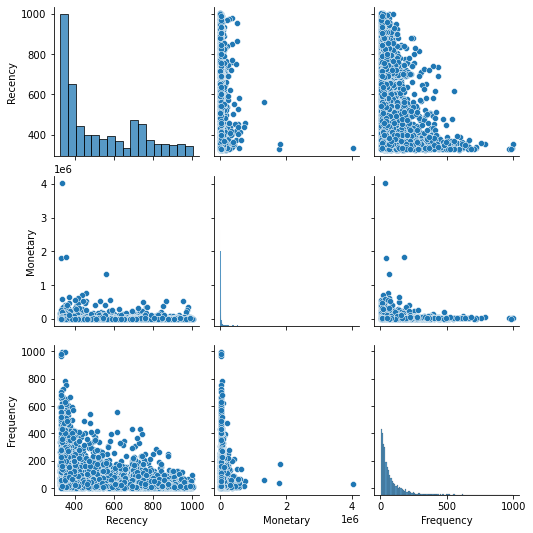

In [37]:
sns.pairplot(df_rfm.drop("Customer_ID", axis=1))

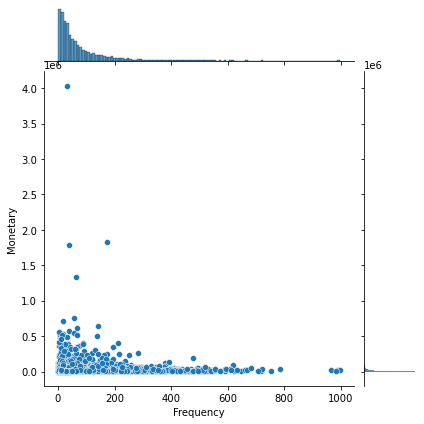

In [38]:
sns.jointplot(data=df_rfm, x="Frequency", y="Monetary")

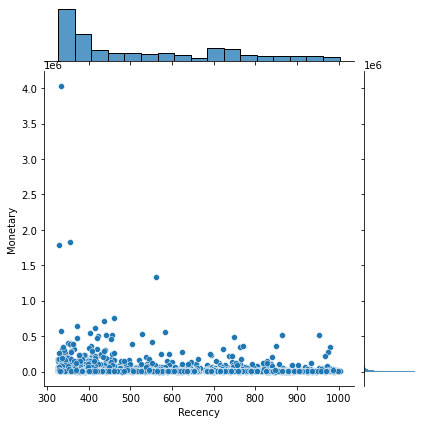

In [39]:
sns.jointplot(data=df_rfm, x="Recency", y="Monetary")

In [43]:
df_rfm.head(2)

,Customer_ID,Recency,Monetary,Frequency
0,12348,402,143581,51
1,12349,345,36694,175


## 5. K-Mean Clustering

In [44]:
# scaling data 
from sklearn.preprocessing import StandardScaler
s = StandardScaler()
s_train = s.fit_transform(df_rfm.drop("Customer_ID", axis=1))
s_train

array([[-0.65851743,  1.39146469, -0.2823613 ],
       [-0.94767199,  0.14443408,  0.96722291],
       [ 0.53361101, -0.24071075, -0.62498922],
       ...,
       [ 2.30912146, -0.08211209, -0.67537568],
       [ 1.37571025, -0.18740508, -0.29243859],
       [-0.82592271,  1.06027888,  0.76567707]])

In [46]:
from sklearn.cluster import KMeans

In [52]:
n_range = range(1,10)
sse=[]

In [55]:
for n in n_range:
    kmeans = KMeans(n_clusters=n)
    kmeans.fit(s_train)
    sse.append(kmeans.inertia_)

In [56]:
sse

[15029.999999999985,
 10411.424335532472,
 7737.9710317711315,
 5082.7111492105705,
 4090.65759576157,
 3265.354291055914,
 2698.754703823511,
 2256.9270101148554,
 1976.9851343769571]

Text(0.5, 1.0, 'Elbow Method')

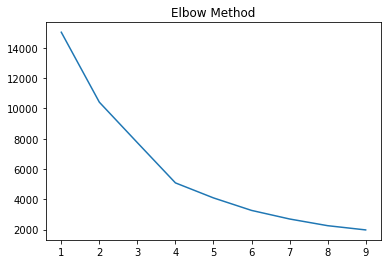

In [69]:
plt.plot(n_range, sse)
plt.title("Elbow Method")

In [59]:
km = KMeans(n_clusters=4)

In [61]:
cluster = km.fit_predict(s_train)

In [64]:
df_rfm['Cluster'] = cluster

In [65]:
df_rfm

,Customer_ID,Recency,Monetary,Frequency,Cluster
0,12348,402,143581,51,0
1,12349,345,36694,175,0
2,12350,637,3682,17,2
3,12351,702,3497,21,2
4,12352,363,13766,100,0
...,...,...,...,...,...
5005,18283,330,7296,984,1
5006,18284,758,8511,28,2
5007,18285,987,17276,12,2
5008,18286,803,8251,50,2


Text(0, 0.5, 'Monetary')

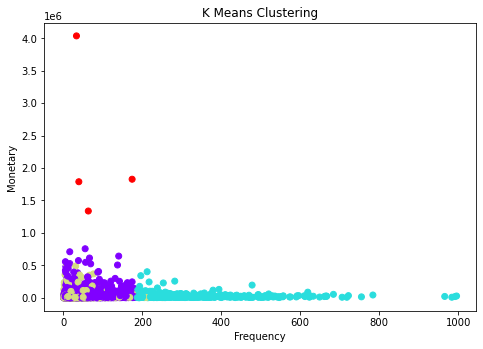

In [70]:
fig = plt.figure()
axes = fig.add_axes([0.1, 0.1, 1, 1])

axes.set_title('K Means Clustering')
axes.scatter(df_rfm['Frequency'],df_rfm['Monetary'],c=df_rfm['Cluster'],cmap='rainbow')

axes.set_xlabel('Frequency') 
axes.set_ylabel('Monetary')


Text(0, 0.5, 'Monetary')

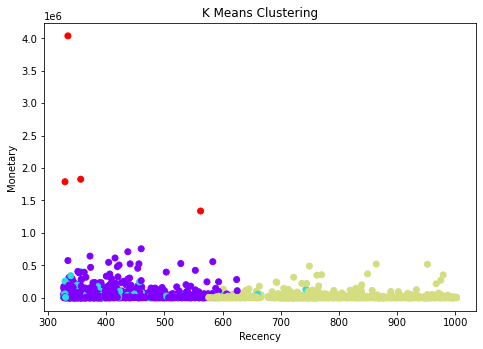

In [68]:
fig = plt.figure()
axes = fig.add_axes([0.1, 0.1, 1, 1])

axes.set_title('K Means Clustering')
axes.scatter(df_rfm['Recency'],df_rfm['Monetary'],c=df_rfm['Cluster'],cmap='rainbow')

axes.set_xlabel('Recency') 
axes.set_ylabel('Monetary')

### 7. Exploring original datasets - not now